## Imports and useful funcs

In [1]:
import pickle

runs_folder = 'Macro_TESA_Lin8'



In [2]:
from torch.utils.data import DataLoader
from Solvation_1.my_nets.Create_dataset import *
from Solvation_1.Vectorizers.vectorizers import *
from Solvation_1.my_nets.LinearNet import *
from Solvation_1.my_nets.net_func import *


## Create dataset

In [3]:
table_v1 = pd.read_table(project_path('Solvation_1/Tables/SS_table_v3.tsv'))
dataset = SS_Dataset(table_v1, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))
len_data = dataset.__len__()
val_data = len_data // 10
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [len_data - val_data, val_data])

solvent_table = pd.read_table(project_path('Solvation_1/Tables/solvent_test_table_v3.tsv'))
solute_table = pd.read_table(project_path('Solvation_1/Tables/solute_test_table_v3.tsv'))
solvent_test_dataset = SS_Dataset(solvent_table, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))
solute_test_dataset = SS_Dataset(solute_table, 'solvent_macro_props1', 'solute_TESA', normalize=(True, True, True))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

solvent_test_loader = DataLoader(solvent_test_dataset, batch_size=46, shuffle=False)
solute_test_loader = DataLoader(solute_test_dataset, batch_size=64, shuffle=False)
print(len(solute_test_loader.dataset))
print(len(solvent_test_loader.dataset))

length-> S: 2529, U: 2529, G: 2529
S: (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863]))
U: (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00]))
G: (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))
length-> S: 2529, U: 2529, G: 2529
S: (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863]))
U: (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00]))
G: (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))
length

In [4]:
print(dataset.norm_params)
try:
    os.makedirs(project_path('Solvation_1/Runs/' + runs_folder))
except FileExistsError:
    pass
with open(project_path('Solvation_1/Runs/' + runs_folder + '/norm_params.pkl'), 'wb+') as f:
    pkl.dump(dataset.norm_params, f)

{'Solvent': (tensor([ 0.0656,  0.2982,  0.2228, 24.6910, 28.1419,  0.3204,  0.2254]), tensor([ 1.4262,  0.1996,  0.2314, 48.5389, 17.9622,  0.1575,  0.0863])), 'Solute': (tensor([46.2081, 23.2195, 32.6769, 33.9146,  2.0706,  6.2217,  6.3596,  1.3146,
         7.2285]), tensor([9.9636e+01, 3.6870e+01, 6.2343e+01, 3.6324e+01, 1.6689e-01, 2.7655e+00,
        2.3217e+00, 7.2206e-02, 2.0575e+00])), 'G': (tensor([2.8032], dtype=torch.float64), tensor([-5.1549], dtype=torch.float64))}


## Train Network

In [5]:
x, y = next(iter(dataset))
x.shape

torch.Size([1, 16])

In [ ]:
in_feat = next(iter(dataset))[0].shape[-1]
verbose = False
model = LinearNet3(in_features = in_feat)
loss_function = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters())
model.train()

MSE = train(model,train_loader, val_loader, solvent_test_loader, solute_test_loader, loss_function, optimizer, epochs=10000, ckp_path=runs_folder)

epoch 0: val loss (1e+16 -> 0.3318215012550354). Saving model
epoch 5: val loss (0.3318215012550354 -> 0.22099174559116364). Saving model
epoch 10: val loss (0.22099174559116364 -> 0.20680367946624756). Saving model
epoch 15: val loss (0.20680367946624756 -> 0.16739730536937714). Saving model
epoch 20: val loss (0.16739730536937714 -> 0.1527029275894165). Saving model
epoch 25: val loss (0.1527029275894165 -> 0.15288951992988586)
epoch 30: val loss (0.1527029275894165 -> 0.1229398176074028). Saving model
epoch 35: val loss (0.1229398176074028 -> 0.12027191370725632). Saving model
epoch 40: val loss (0.12027191370725632 -> 0.13915231823921204)
epoch 45: val loss (0.12027191370725632 -> 0.1105412095785141). Saving model
epoch 50: val loss (0.1105412095785141 -> 0.08901636302471161). Saving model
epoch 55: val loss (0.08901636302471161 -> 0.0915033221244812)
epoch 60: val loss (0.08901636302471161 -> 0.09063723683357239)
epoch 65: val loss (0.08901636302471161 -> 0.1052657812833786)
epoch

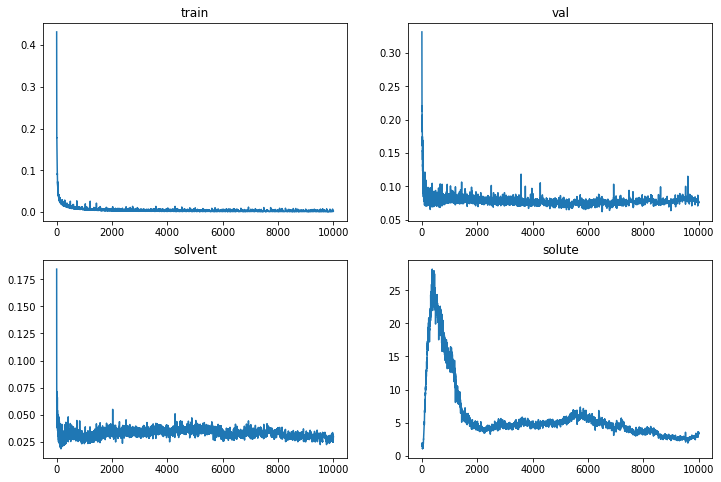

In [7]:
plot_losses(project_path('Solvation_1/Runs/'+runs_folder+'/run_log.tsv'))

solvent water
solute 2-chlorobutane


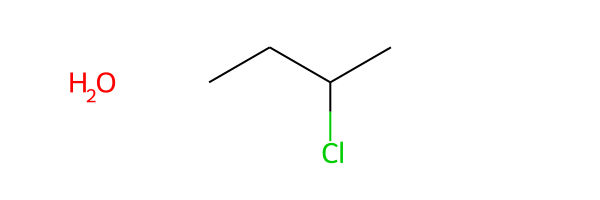

predicted -5.168324329577003, true 0.06999994820344213


In [32]:
beautiful_sample1(model, 'water', '2-chlorobutane')

solvent water
solute 1-chloropentane


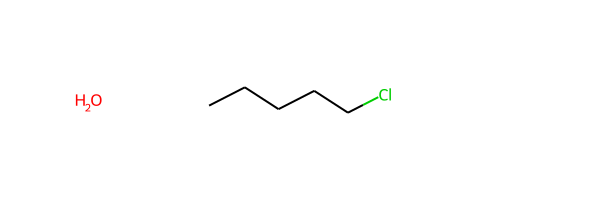

predicted -1.9355587476121459, true 0.06999994820344213


In [33]:
beautiful_sample1(model, 'water', '1-chloropentane')

solvent water
solute 2-chloropentane


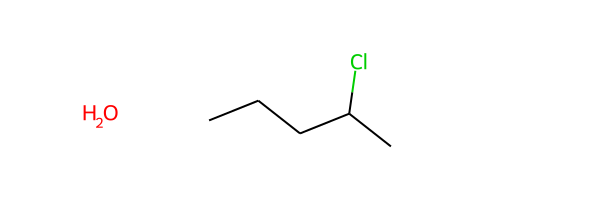

predicted -2.377866020851706, true 0.06999994820344213


In [34]:
beautiful_sample1(model, 'water', '2-chloropentane')


In [23]:
def beautiful_sample1(model, solvent, solute, normalize=(True, True, True)):
    """TODO description"""
    solvent_smiles = get_smiles(solvent)
    solute_smiles = get_smiles(solute)
    solvent_mol = Chem.MolFromSmiles(solvent_smiles)
    solute_mol = Chem.MolFromSmiles(solute_smiles)
    print(f'solvent {solvent}')
    print(f'solute {solute}')
    display(Chem.Draw.MolsToGridImage((solvent_mol, solute_mol)))

    entire = pd.read_table(project_path('Solvation_1/Tables/Entire_table3.tsv'))
    entire = entire.set_index('Unnamed: 0')
    table_sample = entire[[solvent]].loc[[solute]]
    sample_ds = SS_Dataset(table_sample, 'solvent_macro_props1', 'solute_TESA', normalize=normalize, show_norm_params=False)
    sample_loader = DataLoader(sample_ds)

    with torch.no_grad():
        model.eval()
        for vector, G_true in sample_loader:
            std, mean = sample_ds.norm_params['G']
            G_pred = model(vector)
            print(f'predicted {(G_pred*std+mean).squeeze()}, true {(G_true*std+mean).squeeze()}')

